# Analyzing European Data 
### Statistics from 2018

 
<center><img src="./imgs/eu.jpg"/></center>


In [43]:
%%capture
!pip install bubbly
!pip install matplotlib
!pip install seaborn
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
from bubbly.bubbly import bubbleplot 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# for providing path
import os

%%matplotlib inline

In [44]:
pollution = pd.read_csv('./data/pollution_2016.csv')
env_satisfaction = pd.read_csv('./data/env_satisfaction_2013.csv')
life_satisfaction = pd.read_csv('./data/life_satisfaction_2013.csv')
politics = pd.read_csv('./data/trust_in_politics_2013.csv')
income = pd.read_csv('./data/median_income_2016.csv')
legal = pd.read_csv('./data/trust_in_legal_2013.csv')
job_satisfaction = pd.read_csv('./data/job_satisfaction_2013.csv')
budget = pd.read_csv('./data/make_ends_meet_2016.csv')
crime = pd.read_csv('./data/crime_2016.csv')
leisure_satisfaction = pd.read_csv('./data/leisure_satisfaction_2013.csv')
underemployment = pd.read_csv('./data/underemployment_2016.csv')
close_relations = pd.read_csv('./data/close_relations_2015.csv')
low_savings = pd.read_csv('./data/low_savings_2016.csv')
life_expectancy = pd.read_csv('./data/life_expectancy_2016.csv')
unemployment = pd.read_csv('./data/unemployment_2016.csv')
police = pd.read_csv('./data/trust_in_police_2013.csv')
gdp = pd.read_csv('./data/gdp_2016.csv')
health = pd.read_csv('./data/perceived_health_2016.csv')
population = pd.read_csv('./data/population_2011.csv')
work_hours = pd.read_csv('./data/work_hours_2016.csv')
weather = pd.read_csv('./data/weather.csv')

## How the data look like

In [45]:
# let's merge all the datasets on the country column.

x = pd.merge(pollution, env_satisfaction,
                on = 'country')
x1 = pd.merge(x, job_satisfaction,
              on = 'country')
x2 = pd.merge(x1, life_satisfaction,
              on = 'country')
x3 = pd.merge(x2, politics,
              on = 'country')
x4 = pd.merge(x3, income,
              on = 'country')
x5 = pd.merge(x4, legal,
              on = 'country')
x6 = pd.merge(x5, budget,
              on = 'country')
x7 = pd.merge(x6, crime,
              on = 'country')
x8 = pd.merge(x7, leisure_satisfaction,
              on = 'country')
x9 = pd.merge(x8, underemployment,
              on = 'country')
x10 = pd.merge(x9, close_relations,
               on = 'country')
x11 = pd.merge(x10, low_savings,
               on = 'country')
x12 = pd.merge(x11, weather,
               on = 'country')
x13 = pd.merge(x12, life_expectancy,
               on = 'country')
x14 = pd.merge(x13, unemployment,
               on = 'country')
x15 = pd.merge(x14, police,
               on = 'country')
x16 = pd.merge(x15, gdp,
               on = 'country')
x17 = pd.merge(x16, health,
               on = 'country')
x18 = pd.merge(x17, population,
               on = 'country')
data = pd.merge(x18, work_hours,
               on = 'country')

# let's drop some of the useless columns present in the dataset
#data = data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
#                 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
#                  'Unnamed: 15', 'Unnamed: 16'], axis = 1)

data['political_trust_rating'] = data['political_trust_rating']*10
data['legal_trust_rating'] = data['legal_trust_rating']*10
data['unemp_rate'] = data['unemp_rate']*10
data['police_trust_rating'] = data['police_trust_rating']*10
data['total_pop'] = data['total_pop']/805550

# divinding the values of median income and gdp to get the values within the range of 100
# I have used the minimum and maximum values to get the normalized values between 0 and 100.
data['median_income'] = data['median_income']/287
data['gdp'] = data['gdp']/31600


# let's transpose and check the dataset
df = data
df.head()

,country,prct_rpt_pollution,prct_env_satis_high,prct_env_satis_med,prct_env_satis_low,prct_job_satis_high,prct_job_satis_med,prct_job_satis_low,prct_life_satis_high,prct_life_satis_med,...,police_trust_rating,gdp,prct_health_verygood,prct_health_good,prct_health_fair,prct_health_bad,prct_health_verybad,total_pop,prct_yng_adt_pop,avg_hrs_worked
0,Belgium,13.2,22.2,70.3,7.5,23.0,68.5,8.5,20.9,69.9,...,61.0,13.438617,29.8,43.9,17.0,7.2,2.0,13.656059,18.485146,37.0
1,Bulgaria,15.1,8.4,32.6,59.0,16.1,36.1,47.7,5.9,29.8,...,36.0,1.523057,19.1,46.7,23.2,8.7,2.3,9.142288,18.432577,40.8
2,Czechia,13.5,33.5,48.7,17.8,29.6,51.4,19.0,21.3,53.3,...,49.0,5.581332,18.6,41.8,27.9,9.7,2.0,12.955819,18.862489,40.3
3,Denmark,6.8,52.2,36.9,10.9,44.4,46.4,9.2,42.7,46.6,...,79.0,8.926896,26.5,44.8,21.1,5.4,2.2,6.902896,18.082004,32.9
4,Germany,23.2,40.9,43.1,15.9,25.0,50.7,24.3,25.0,55.8,...,64.0,99.992089,18.0,47.2,26.5,6.9,1.4,99.583756,17.105590,35.1


#### GDP vs Job vs Population 

In [47]:
import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = df, x_column='gdp', y_column='prct_job_satis_high', 
    bubble_column='country', size_column='total_pop', color_column='country',
    x_title="GDP", y_title="Job Satisfaction", title='GDP vs Job vs Population',
    x_logscale=False, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

* There is no direct relation between GDP and Job satisfacction, because a lot of other unforseeable factors are involved for job satisfaction in the citizens.
* Germany being the Top GDP state has a very low job satisfaction.
* Denmark, Austria, Finland, Norway having a low population, and lower GDP have very high job satisfaction in their states.

In [5]:
import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = df, x_column='gdp', y_column='prct_job_satis_high', 
    bubble_column='country', size_column='total_pop', color_column='country',
    x_title="GDP", y_title="Job Satisfaction", title='GDP vs Job vs Population',
    x_logscale=False, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

In [6]:
import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = df, x_column='median_income', y_column='prct_env_satis_high', 
    bubble_column='country', size_column='total_pop', color_column='country',
    x_title="Income", y_title="Environment Satisfaction", title='Income vs Environment vs Population',
    x_logscale=False, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

In [7]:
import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = df, x_column='life_expect', y_column='prct_rpt_crime', 
    bubble_column='country', size_column='total_pop', color_column='country',
    x_title="Life Expectancy", y_title="crime", title='Life Expectancy vs Pollution',
    x_logscale=False, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

In [8]:
import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = df, x_column='avg_hrs_worked', y_column='prct_leisure_satis_high', 
    bubble_column='country', size_column='total_pop', color_column='country', 
    x_title="Hours Worked", y_title="Leisure Satisfaction", title='Hours worked vs Leisure Satisfaction',
    x_logscale=False, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

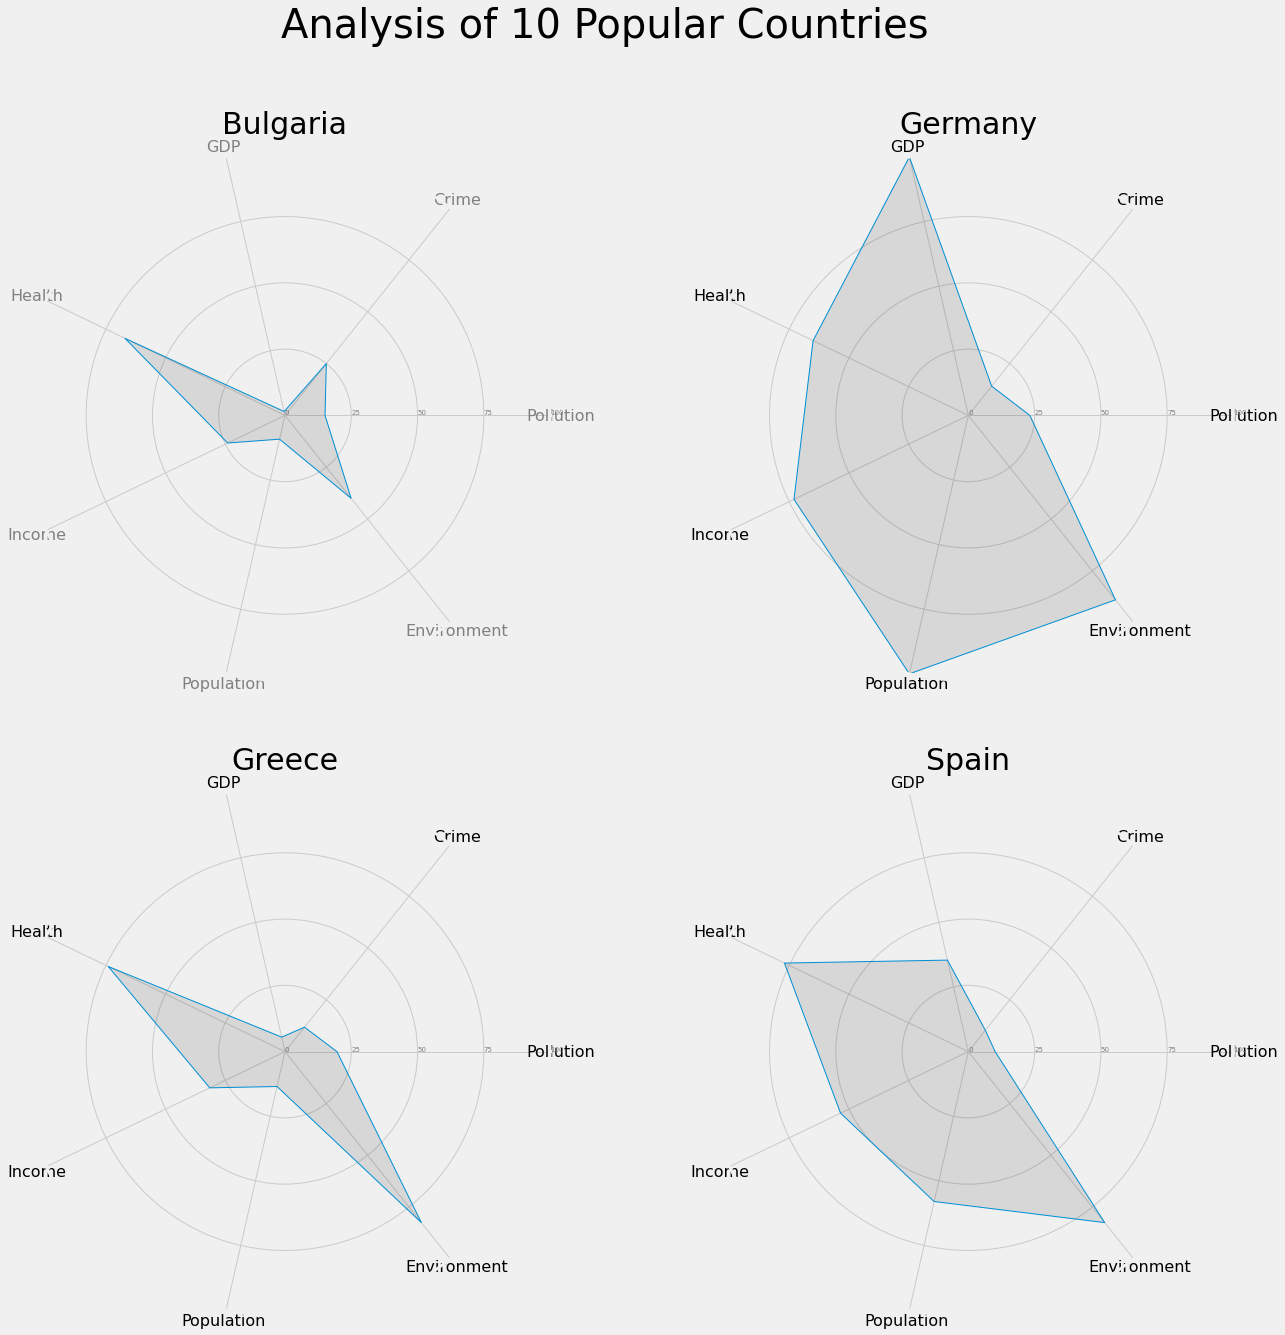

In [9]:
plt.rcParams['figure.figsize'] = (20, 20)

from math import pi

df = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [15.1, 0],
    'Crime': [25, 0],
    'GDP': [1.5, 0],
    'Health': [67, 0],
    'Income': [24, 0],
    'Population': [9.2, 0],
    'Environment': [40, 0]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(221, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Bulgaria', fontsize = 30)

df2 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [23.2, 0],
    'Crime': [14.1, 0],
    'GDP': [100, 0],
    'Health': [65, 0],
    'Income': [73, 0],
    'Population': [100, 0],
    'Environment': [89, 0]
})
# number of variable
categories2 = list(df2)[1:]
N2 = len(categories2)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N2) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Germany', fontsize = 30)
df3 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [19.6, 0],
    'Crime': [11.8, 0],
    'GDP': [5.6, 0],
    'Health': [74, 0],
    'Income': [31.5, 0],
    'Population': [13.5, 0],
    'Environment': [82.5, 0]
})
# number of variable
categories3 = list(df3)[1:]
N3 = len(categories3)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df3.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N3) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(223, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Greece', fontsize = 30)

df4 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [10.1, 0],
    'Crime': [10.3, 0],
    'GDP': [35.4, 0],
    'Health': [77, 0],
    'Income': [53.5, 0],
    'Population': [58, 0],
    'Environment': [82.5, 0]
})
# number of variable
categories4 = list(df4)[1:]
N4 = len(categories4)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df4.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N4) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(224, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.suptitle('Analysis of 10 Popular Countries', fontsize = 40)
plt.title('Spain', fontsize = 30)
plt.show()

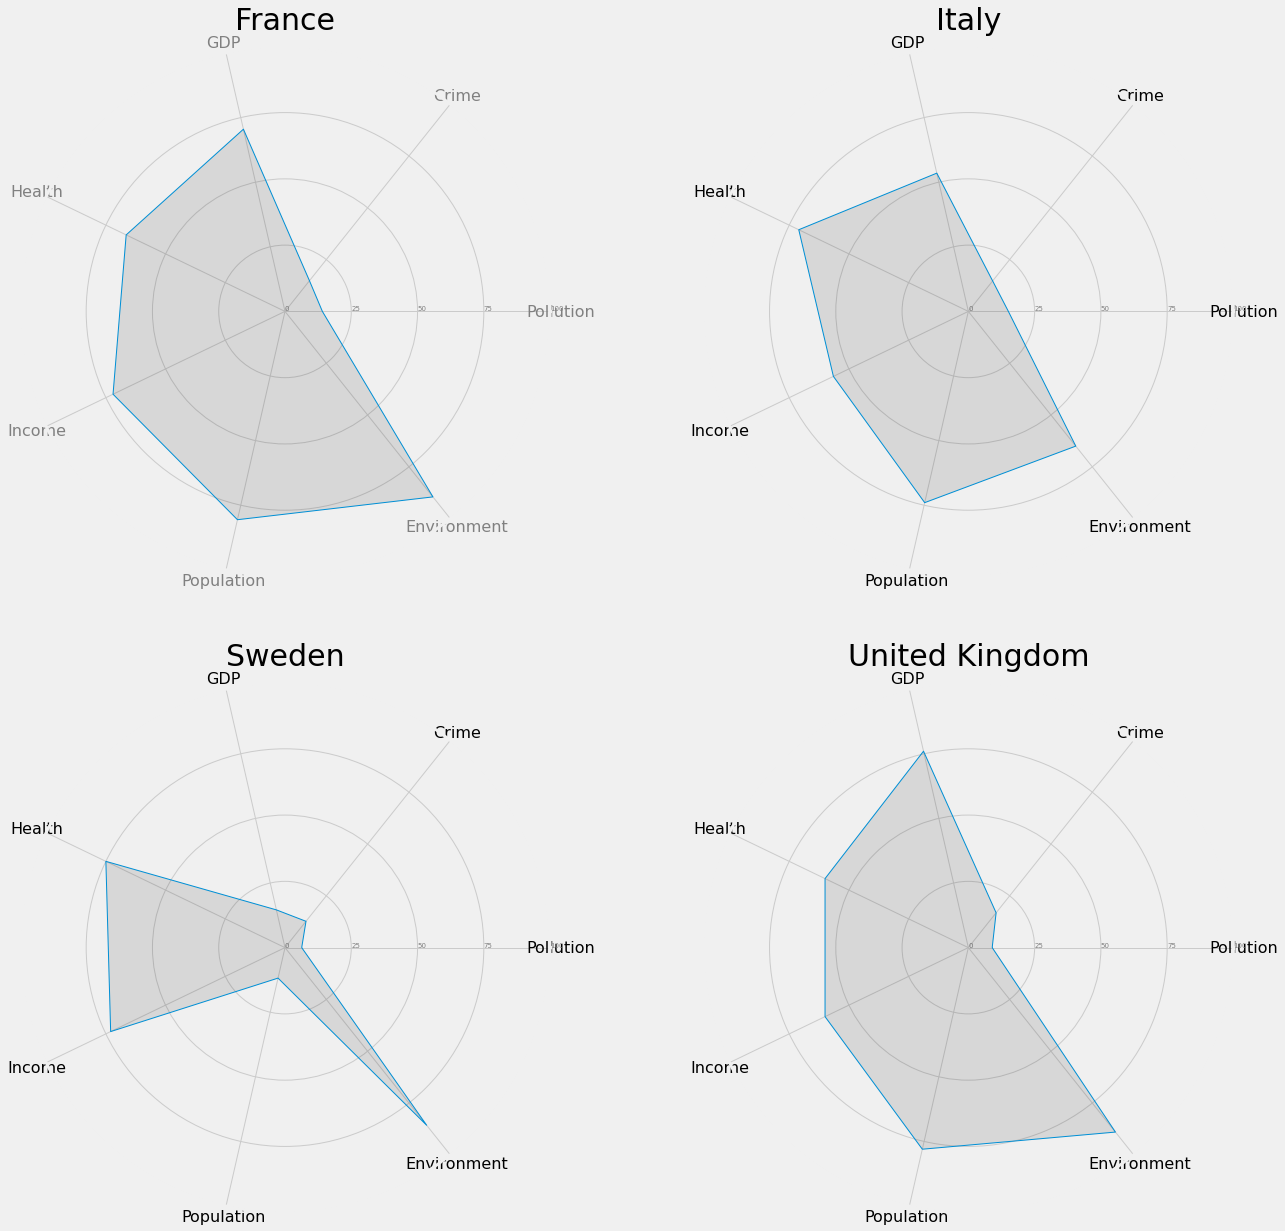

In [10]:
plt.rcParams['figure.figsize'] = (20, 20)

from math import pi

df = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [14.1, 0],
    'Crime': [14.8, 0],
    'GDP': [70.5, 0],
    'Health': [66.5, 0],
    'Income': [72, 0],
    'Population': [80.6, 0],
    'Environment': [89.5, 0]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(221, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('France', fontsize = 30)

df2 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [15.1, 0],
    'Crime': [14.7, 0],
    'GDP': [53.5, 0],
    'Health': [71, 0],
    'Income': [56.5, 0],
    'Population': [74, 0],
    'Environment': [65, 0]
})
# number of variable
categories2 = list(df2)[1:]
N2 = len(categories2)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N2) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Italy', fontsize = 30)

df3 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [6.3, 0],
    'Crime': [12.7, 0],
    'GDP': [14.6, 0],
    'Health': [75, 0],
    'Income': [73, 0],
    'Population': [11.8, 0],
    'Environment': [85.7, 0]
})
# number of variable
categories3 = list(df3)[1:]
N3 = len(categories3)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df3.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N3) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(223, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Sweden', fontsize = 30)

df4 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [9, 0],
    'Crime': [16.8, 0],
    'GDP': [76, 0],
    'Health': [60, 0],
    'Income': [60, 0],
    'Population': [78, 0],
    'Environment': [89, 0]
})
# number of variable
categories4 = list(df4)[1:]
N4 = len(categories4)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df4.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N4) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(224, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('United Kingdom', fontsize = 30)
plt.show()

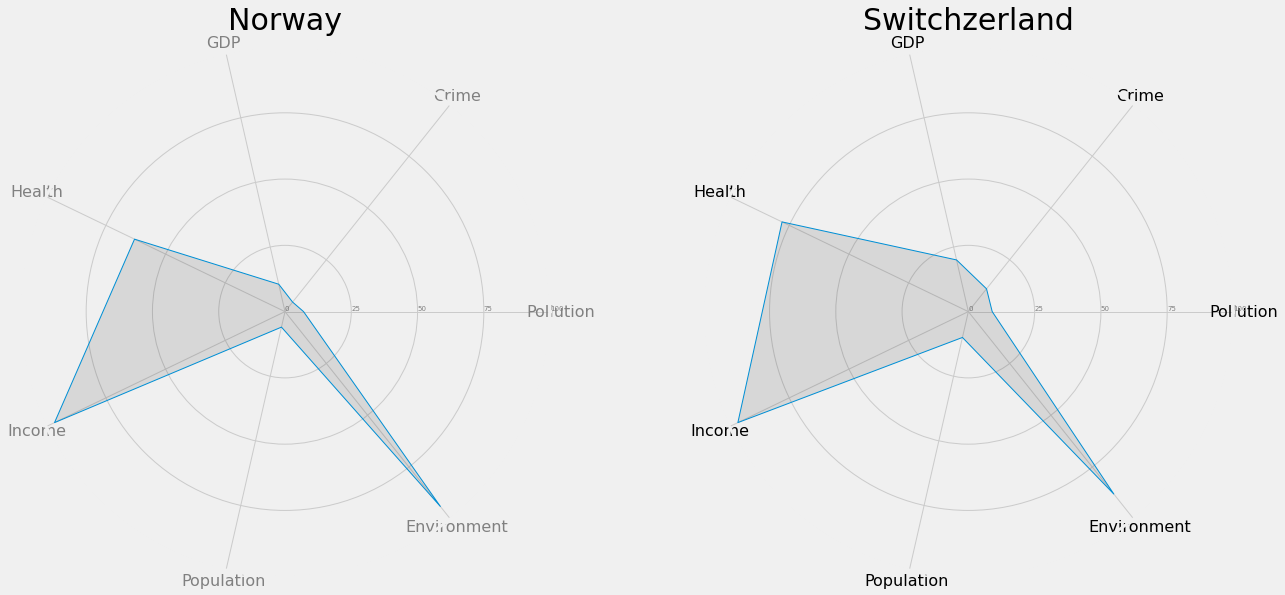

In [11]:
plt.rcParams['figure.figsize'] = (20, 20)

from math import pi

df = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [7, 0],
    'Crime': [4.6, 0],
    'GDP': [10.6, 0],
    'Health': [63, 0],
    'Income': [96.5, 0],
    'Population': [6, 0],
    'Environment': [94, 0]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(221, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Norway', fontsize = 30)

df2 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [9, 0],
    'Crime': [11, 0],
    'GDP': [20, 0],
    'Health': [78, 0],
    'Income': [96.5, 0],
    'Population': [10, 0],
    'Environment': [88, 0]
})
# number of variable
categories2 = list(df2)[1:]
N2 = len(categories2)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N2) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=16)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Switchzerland', fontsize = 30)
plt.show()

In [12]:
trace = [go.Choropleth(
               colorscale = 'YlOrRd',
               locationmode = 'country names',
               locations = underemployment['country'],
               text = underemployment['country'], 
               z = underemployment['med_income_underemp'],
               )]
layout = go.Layout(title = 'Under Employment in Police in European Countries',
                geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [13]:
trace = [go.Bar(
             x = underemployment['country'],
             y = underemployment['med_income_underemp'],
             name = 'Under Employment',
             marker = dict(color = 'rgb(74, 47, 44)'),
)]
layout = go.Layout(title = 'Under Employment in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [14]:
trace = [go.Choropleth(
               colorscale = 'Rainbow',
               locationmode = 'country names',
               locations = unemployment['country'],
               text = unemployment['country'], 
               z = unemployment['unemp_rate'],
               )]
layout = go.Layout(title = 'Unemployment Rate in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [15]:
trace = [go.Bar(
             x = unemployment['country'],
             y = unemployment['unemp_rate'],
             name = 'Unemployment',
             marker = dict(color = 'rgb(4, 17, 54)'),
)]
layout = go.Layout(title = 'Unemployment in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [16]:
trace = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = politics['country'],
               text = politics['country'], 
               z = politics['political_trust_rating'],
               )]
layout = go.Layout(title = 'Political Trust in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [17]:
trace = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = police['country'],
               text = police['country'], 
               z = police['police_trust_rating'],
               )]
layout = go.Layout(title = 'Trust in Police in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [18]:
trace = [go.Bar(
             x = police['country'],
             y = police['police_trust_rating'],
             name = 'Under Employment',
             marker = dict(color = 'rgb(7, 147, 244)'),
)]
layout = go.Layout(title = 'Satisfaction with Police in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [19]:
trace = [go.Choropleth(
               colorscale = 'Blackbody',
               locationmode = 'country names',
               locations = health['country'],
               text = health['country'], 
               z = health['prct_health_verygood'],
               )]
layout = go.Layout(title = 'Good Health in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
fig.show()

In [20]:
trace = go.Bar(
             x = health['country'],
             y = health['prct_health_verygood'],
             name = 'Very Good Health',
             marker = dict(color = 'rgb(10, 15, 20)'),
)
trace2 = go.Bar(
             x = health['country'],
             y = health['prct_health_good'],
             name = 'Good Health',
             marker = dict(color = 'rgb(170, 165, 160)'),
)
trace3 = go.Bar(
             x = health['country'],
             y = health['prct_health_fair'],
             name = 'Fair Health',
             marker = dict(color = 'rgb(100, 110, 120)'),
)
trace4 = go.Bar(
             x = health['country'],
             y = health['prct_health_bad'],
             name = 'Bad Health',
             marker = dict(color = 'rgb(70, 80, 90)'),
)
trace5 = go.Bar(
             x = health['country'],
             y = health['prct_health_verybad'],
             name = 'Very Bad Health',
             marker = dict(color = 'rgb(5, 10, 5)'),
)
data = [trace, trace2, trace3, trace4, trace5]
layout = go.Layout(title = 'Health in Europe',
                  barmode = 'relative')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [21]:
trace = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = pollution['country'],
               text = pollution['country'], 
               z = pollution['prct_rpt_pollution'],
               )]
layout = go.Layout(title = 'Avg. Pollution in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [22]:
trace = [go.Bar(
             x = pollution['country'],
             y = pollution['prct_rpt_pollution'],
             name = 'Pollution',
             marker = dict(color = 'rgb(220, 220, 220)'),
)]
layout = go.Layout(title = 'Pollution in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [23]:
trace = [go.Choropleth(
               colorscale = 'Blues',
               locationmode = 'country names',
               locations = weather['country'],
               text = weather['country'], 
               z = weather['avg_precipitation'],
               )]
layout = go.Layout(title = 'Avg. Precipitation in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [24]:
trace = go.Bar(
             x = weather['country'],
             y = weather['avg_temp'],
             name = 'Average Temp.',
             marker = dict(color = 'rgb(250, 250, 200)'),
)
trace2 = go.Bar(
             x = weather['country'],
             y = weather['avg_high_temp'],
             name = 'Avg. High Temp',
             marker = dict(color = 'rgb(20, 20, 20)'),
)
trace3 = go.Bar(
             x = weather['country'],
             y = weather['avg_low_temp'],
             name = 'Avg. Low Temp',
             marker = dict(color = 'rgb(186, 200, 250)'),
)
trace4 = go.Bar(
             x = weather['country'],
             y = weather['avg_precipitation'],
             name = 'Avg. Precipitation',
             marker = dict(color = 'rgb(220, 190, 220)'),
)
df = [trace, trace2, trace3, trace4]
layout = go.Layout(title = 'Weather in Europe',
                  barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [25]:
trace = [go.Choropleth(
               colorscale = 'Viridis',
               locationmode = 'country names',
               locations = weather['country'],
               text = weather['country'], 
               z = weather['avg_temp'],
               )]
layout = go.Layout(title = 'Avg. Temperature in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [26]:
trace = [go.Choropleth(
               colorscale = 'Reds',
               locationmode = 'country names',
               locations = low_savings['country'],
               text = low_savings['country'], 
               z = low_savings['prct_low_savings'],
               )]
layout = go.Layout(title = 'Low Savings in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [27]:
trace = [go.Bar(
             x = low_savings['country'],
             y = low_savings['prct_low_savings'],
             name = 'Low Savings',
             marker = dict(color = 'rgb(250, 200, 190)'),
)]
layout = go.Layout(title = 'Low Savings in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [28]:
trace = [go.Choropleth(
               colorscale = 'Cividis',
               locationmode = 'country names',
               locations = life_expectancy['country'],
               text = life_expectancy['country'], 
               z = life_expectancy['life_expect'],
               )]
layout = go.Layout(title = 'Life Expectancy in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [29]:
trace = [go.Bar(
             x = life_expectancy['country'],
             y = life_expectancy['life_expect'],
             name = 'Life Expectancy',
             marker = dict(color = 'rgb(190, 220, 250)'),
)]
layout = go.Layout(title = 'Life Expectancy in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [30]:
trace = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = leisure_satisfaction['country'],
               text = leisure_satisfaction['country'], 
               z = leisure_satisfaction['prct_leisure_satis_high'],
               )]
layout = go.Layout(title = 'High Leisure Satisfaction in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [31]:
trace = go.Bar(
             x = leisure_satisfaction['country'],
             y = leisure_satisfaction['prct_leisure_satis_high'],
             name = 'High Satisfaction',
             marker = dict(color = 'rgb(240, 240, 240)'),
)
trace2 = go.Bar(
             x = leisure_satisfaction['country'],
             y = leisure_satisfaction['prct_leisure_satis_med'],
             name = 'Medium Satisfaction',
             marker = dict(color = 'rgb(90, 30, 40)'),
)
trace3 = go.Bar(
             x = leisure_satisfaction['country'],
             y = leisure_satisfaction['prct_leisure_satis_low'],
             name = 'Low Satisfaction',
             marker = dict(color = 'rgb(138, 208, 138)'),
)

df = [trace, trace2, trace3]
layout = go.Layout(title = 'Leisure Satisfaction in Europe',
                  barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [32]:
trace = [go.Choropleth(
               colorscale = 'Rainbow',
               locationmode = 'country names',
               locations = job_satisfaction['country'],
               text = job_satisfaction['country'], 
               z = job_satisfaction['prct_job_satis_high'],
               )]
layout = go.Layout(title = 'High Job Satisfaction in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [33]:
trace = go.Bar(
             x = job_satisfaction['country'],
             y = job_satisfaction['prct_job_satis_high'],
             name = 'job_satisfaction',
             marker = dict(color = 'orange'),
)
trace2 = go.Bar(
             x = job_satisfaction['country'],
             y = job_satisfaction['prct_job_satis_med'],
             name = 'job_satisfaction',
             marker = dict(color = 'lightgreen'),
)
trace3 = go.Bar(
             x = job_satisfaction['country'],
             y = job_satisfaction['prct_job_satis_low'],
             name = 'job_satisfaction',
             marker = dict(color = 'pink'),
)
df = [trace, trace2, trace3]
layout = go.Layout(title = 'Job Satisfaction in Europe',
                   barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [34]:
trace = [go.Choropleth(
               colorscale = 'Greys',
               locationmode = 'country names',
               locations = gdp['country'],
               text = gdp['country'], 
               z = gdp['gdp'],
               )]
layout = go.Layout(title = 'GDP in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [35]:
trace = [go.Bar(
             x = gdp['country'],
             y = gdp['gdp'],
             name = 'GDP',
             marker = dict(color = 'rgb(96, 76, 56)'),
)]
layout = go.Layout(title = 'GDP in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [36]:
trace = [go.Choropleth(
               colorscale = 'Blackbody',
               locationmode = 'country names',
               locations = crime['country'],
               text = crime['country'], 
               z = crime['prct_rpt_crime'],
               )]

layout = go.Layout(title = 'Percentage of Reported Crime in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [37]:
trace = [go.Bar(
             x = crime['country'],
             y = crime['prct_rpt_crime'],
             name = 'Crime',
             marker = dict(color = 'rgb(90, 20, 50)'),
)]


layout = go.Layout(title = 'Crime in Europe')
fig = go.Figure(data = trace, layout = layout)


iplot(fig)

In [38]:
trace = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = close_relations['country'],
               text = close_relations['country'], 
               z = close_relations['prct_close_relat'],
               )]


layout = go.Layout(title = 'Percentage of Close Relations in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [39]:
trace = [go.Bar(
             x = close_relations['country'],
             y = close_relations['prct_close_relat'],
             name = 'Close Relations',
             marker = dict(color = 'rgb(90, 120, 50)'),
)]
layout = go.Layout(title = 'Close Relations in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [40]:
trace = [go.Choropleth(
               colorscale = 'Jet',
               locationmode = 'country names',
               locations = population['country'],
               text = population['country'], 
               z = population['prct_yng_adt_pop'],
               )]

layout = go.Layout(title = 'Percentage of young population in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)

In [41]:
trace = go.Bar(
             x = life_expectancy['country'],
             y = life_expectancy['life_expect'],
             name = 'Population',
             marker = dict(color = 'rgb(8, 19, 20)'),
)
trace = go.Bar(
             x = life_expectancy['country'],
             y = life_expectancy['life_expect'],
             name = 'Young Population',
             marker = dict(color = 'rgb(135, 135, 135)'),
)
df = [trace, trace2]

layout = go.Layout(title = 'Population in Europe',
                  barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [42]:
trace = [go.Choropleth(
               colorscale = 'YlOrRd',
               locationmode = 'country names',
               locations = population['country'],
               text = population['country'], 
               z = population['total_pop'],
               )]

layout = go.Layout(title = 'Population in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,)
                  )

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, height=800)
iplot(fig)